In [1]:
import pandas as pd

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x22a584b0d48>)

In [5]:
locations_df=pd.read_csv('locations.csv')

In [6]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [8]:
locations_df[locations_df.location=='Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [9]:
from urllib.request import urlretrieve

In [10]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url )

('C:\\Users\\Niloy\\AppData\\Local\\Temp\\tmp9wdtwp22',
 <http.client.HTTPMessage at 0x22a585ca648>)

In [11]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [12]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [13]:
covid_df['location']='Italy'

In [14]:
covid_df

,date,new_cases,new_deaths,new_tests,location
0,2019-12-31,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,Italy
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,Italy
245,2020-09-01,996.0,6.0,54395.0,Italy
246,2020-09-02,975.0,8.0,NaN,Italy


#We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [15]:
merged_df = covid_df.merge(locations_df, on="location")

In [16]:
merged_df

,date,new_cases,new_deaths,new_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


#The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [23]:
merged_df['cases_per_million'] = merged_df.new_cases.sum() * 1e6 / merged_df.population

In [24]:
merged_df

,date,new_cases,new_deaths,new_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million
0,2019-12-31,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
1,2020-01-01,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
2,2020-01-02,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
3,2020-01-03,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
4,2020-01-04,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
244,2020-08-31,1365.0,4.0,42583.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
245,2020-09-01,996.0,6.0,54395.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602
246,2020-09-02,975.0,8.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602


In [25]:
merged_df['deaths_per_million'] = merged_df.new_deaths.sum() * 1e6 / merged_df.population

In [26]:
merged_df

,date,new_cases,new_deaths,new_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
1,2020-01-01,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
2,2020-01-02,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
3,2020-01-03,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
4,2020-01-04,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
244,2020-08-31,1365.0,4.0,42583.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
245,2020-09-01,996.0,6.0,54395.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697
246,2020-09-02,975.0,8.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4490.684602,587.097697


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [29]:
result_df = merged_df[['date',
                       'new_cases', 
                        
                       'new_deaths', 
                        
                       'new_tests', 
                        
                       'cases_per_million', 
                       'deaths_per_million']] 
                      

In [30]:
result_df

,date,new_cases,new_deaths,new_tests,cases_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,4490.684602,587.097697
1,2020-01-01,0.0,0.0,NaN,4490.684602,587.097697
2,2020-01-02,0.0,0.0,NaN,4490.684602,587.097697
3,2020-01-03,0.0,0.0,NaN,4490.684602,587.097697
4,2020-01-04,0.0,0.0,NaN,4490.684602,587.097697
...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,4490.684602,587.097697
244,2020-08-31,1365.0,4.0,42583.0,4490.684602,587.097697
245,2020-09-01,996.0,6.0,54395.0,4490.684602,587.097697
246,2020-09-02,975.0,8.0,NaN,4490.684602,587.097697


To write the data from the data frame into a file, we can use the `to_csv` function. 

In [31]:
result_df.to_csv('results.csv', index=None)

In [32]:
result_df

,date,new_cases,new_deaths,new_tests,cases_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,4490.684602,587.097697
1,2020-01-01,0.0,0.0,NaN,4490.684602,587.097697
2,2020-01-02,0.0,0.0,NaN,4490.684602,587.097697
3,2020-01-03,0.0,0.0,NaN,4490.684602,587.097697
4,2020-01-04,0.0,0.0,NaN,4490.684602,587.097697
...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,4490.684602,587.097697
244,2020-08-31,1365.0,4.0,42583.0,4490.684602,587.097697
245,2020-09-01,996.0,6.0,54395.0,4490.684602,587.097697
246,2020-09-02,975.0,8.0,NaN,4490.684602,587.097697


## Bonus: Basic Plotting with Pandas

We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

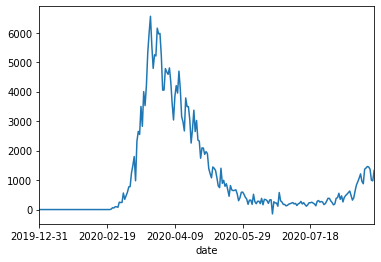

In [40]:
result_df.new_cases.plot();

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

In [36]:
result_df.set_index('date', inplace=True)

In [37]:
result_df

,new_cases,new_deaths,new_tests,cases_per_million,deaths_per_million
date,,,,,
2019-12-31,0.0,0.0,NaN,4490.684602,587.097697
2020-01-01,0.0,0.0,NaN,4490.684602,587.097697
2020-01-02,0.0,0.0,NaN,4490.684602,587.097697
2020-01-03,0.0,0.0,NaN,4490.684602,587.097697
2020-01-04,0.0,0.0,NaN,4490.684602,587.097697
...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,4490.684602,587.097697
2020-08-31,1365.0,4.0,42583.0,4490.684602,587.097697
2020-09-01,996.0,6.0,54395.0,4490.684602,587.097697


In [39]:
result_df.loc['2020-09-01']

new_cases               996.000000
new_deaths                6.000000
new_tests             54395.000000
cases_per_million      4490.684602
deaths_per_million      587.097697
Name: 2020-09-01, dtype: float64

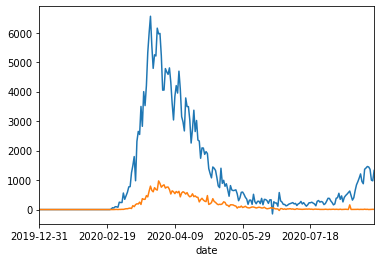

In [41]:
result_df.new_cases.plot();
result_df.new_deaths.plot();

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

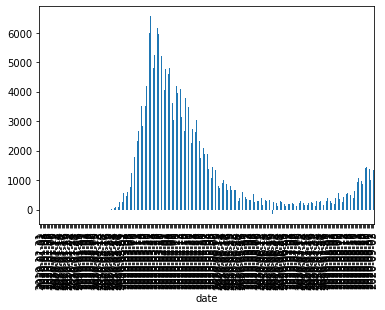

In [43]:
result_df.new_cases.plot(kind='bar');